In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# download data and init samplers
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


bird frog truck deer


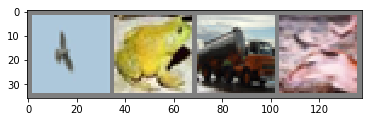

In [11]:
# show some images
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# show labels
print(' '.join([classes[l] for l in labels]))

In [14]:
# define a cnn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
# train
for epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        net.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('epoch: ', epoch + 1, 'i: ', i + 1, 'average loss: ', running_loss / 2000)
            running_loss = 0.0
            
print('Finished Training')

epoch:  1 i:  2000 average loss:  2.1516722827255728
epoch:  1 i:  4000 average loss:  1.8121195098161698
epoch:  1 i:  6000 average loss:  1.6755427312552928
epoch:  1 i:  8000 average loss:  1.6007555362284183
epoch:  1 i:  10000 average loss:  1.5273838416486978
epoch:  1 i:  12000 average loss:  1.4894469691216945
epoch:  2 i:  2000 average loss:  1.4354957048520445
epoch:  2 i:  4000 average loss:  1.3898042102009058
epoch:  2 i:  6000 average loss:  1.3644115151390432
epoch:  2 i:  8000 average loss:  1.3481328402012587
epoch:  2 i:  10000 average loss:  1.3302668665498496
epoch:  2 i:  12000 average loss:  1.2949921759665013
Finished Training


Ground truth:  cat ship ship plane


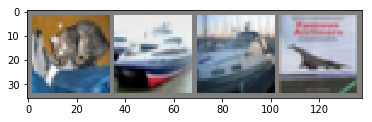

In [31]:
# display some image from test set
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground truth: ', ' '.join([classes[l] for l in labels]))

In [39]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join([classes[l] for l in predicted]))

Predicted:  cat ship ship ship


In [43]:
# performance on the whole dataset
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Total accuracy: ', correct / total)

Total accuracy:  0.5427


In [75]:
# class-wise accuracy
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_total[label] += 1
            class_correct[label] += c[i].item()

for i in range(10):
    print(classes[i], ' has accuracy: ', class_correct[i] / class_total[i])

plane  has accuracy:  0.613
car  has accuracy:  0.55
bird  has accuracy:  0.557
cat  has accuracy:  0.265
deer  has accuracy:  0.376
dog  has accuracy:  0.639
frog  has accuracy:  0.607
horse  has accuracy:  0.47
ship  has accuracy:  0.727
truck  has accuracy:  0.623
